In [58]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [59]:
#Read the data
df = pd.read_csv('../data/WaterQData.csv',parse_dates=['ActivityStartDate'])
df.set_index('ActivityStartDate',inplace=True)
df.columns

Index(['OrganizationIdentifier_x', 'MonitoringLocationIdentifier',
       'MonitoringLocationName', 'DrainageAreaMeasure/MeasureValue',
       'DrainageAreaMeasure/MeasureUnitCode', 'LatitudeMeasure',
       'LongitudeMeasure', 'OrganizationIdentifier_y',
       'ResultDetectionConditionText', 'CharacteristicName',
       'ResultSampleFractionText', 'ResultMeasureValue',
       'ResultMeasure/MeasureUnitCode', 'DetectionQuantitationLimitTypeName',
       'DetectionQuantitationLimitMeasure/MeasureValue',
       'DetectionQuantitationLimitMeasure/MeasureUnitCode', 'TotalN', 'Year',
       'Month'],
      dtype='object')

In [60]:
#Get list of siteIDs
siteIDs = df['MonitoringLocationIdentifier'].unique().tolist()
siteIDs

['USGS-02096846',
 'USGS-0209684980',
 'USGS-0209699999',
 'USGS-02097464',
 'USGS-0209749990',
 'USGS-0209768310',
 'USGS-0209771550',
 'USGS-0209782609',
 'USGS-0209799150',
 'USGS-0209801100']

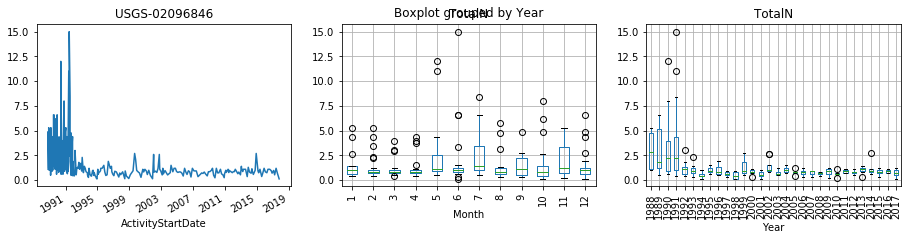

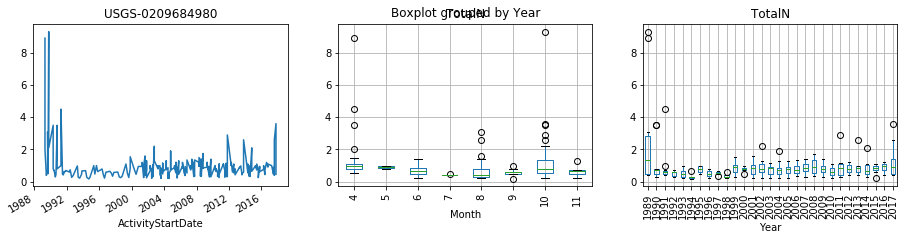

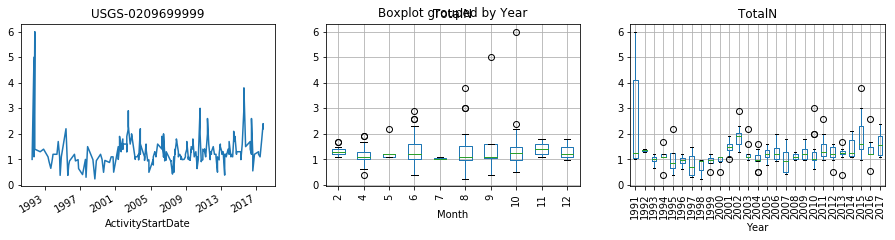

In [141]:
#Construct the canvas
for i in range(3):
    #Create the figure
    fig, ax = plt.subplots(1,3)
    fig.set_figheight(3)
    fig.set_figwidth(15)
    
    #Get the site
    siteID = siteIDs[i]
    
    #Subset the data for the given site
    dfSite = df[df['MonitoringLocationIdentifier'] == siteID].sort_index()
    
    #Create sub plots
    dfSite['TotalN'].plot(title=siteID,ax=ax[0])
    dfSite.boxplot(column='TotalN',by='Month',rot=90,ax=ax[1])
    dfSite.boxplot(column='TotalN',by='Year',rot=90,ax=ax[2])
    
    plt.show()#tight_layout()

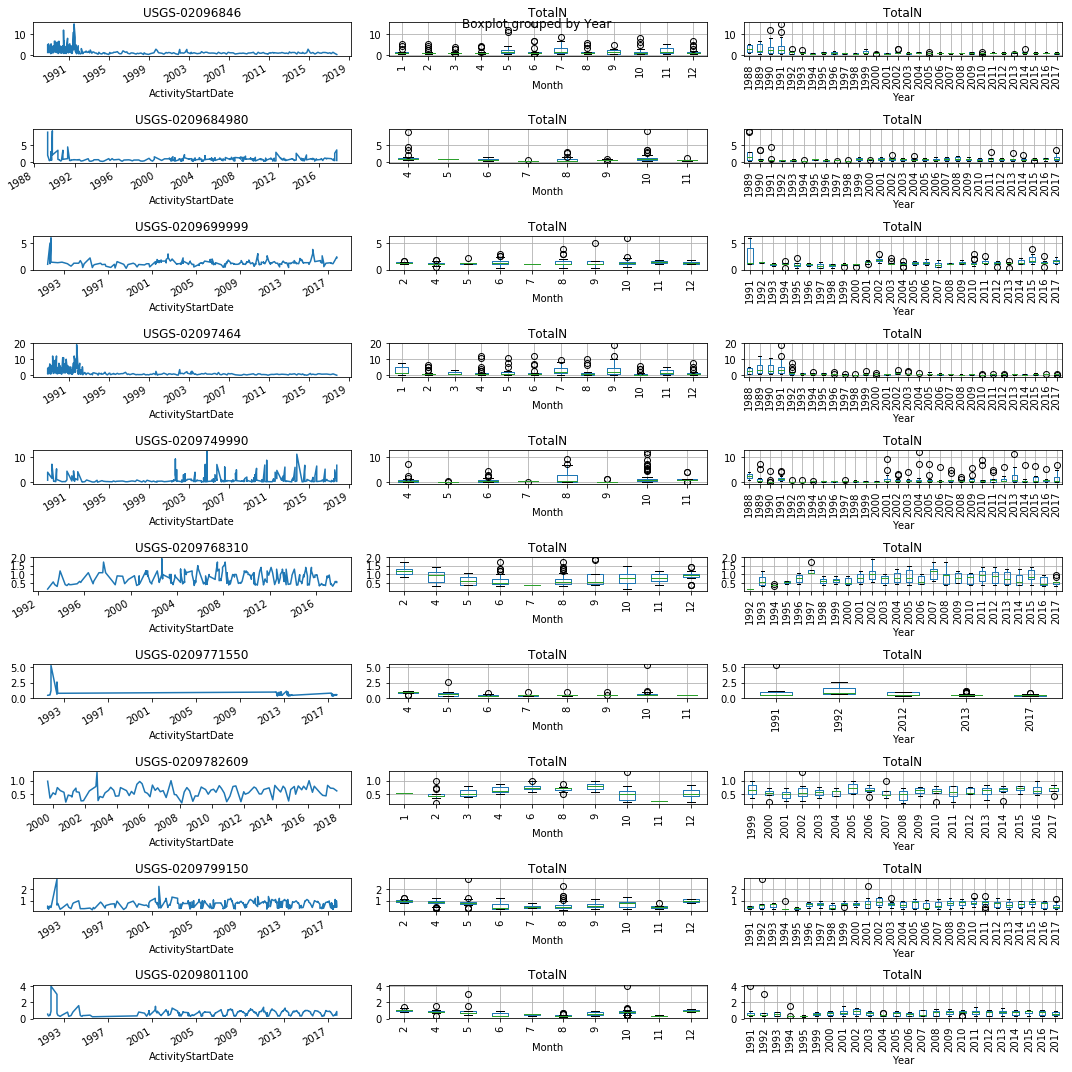

In [112]:
#Construct the canvas
fig, ax = plt.subplots(10,3)
fig.set_figheight(50)
fig.set_figwidth(15)
for i in range(10):
    siteID = siteIDs[i]
    dfSite = df[df['MonitoringLocationIdentifier'] == siteID].sort_index()
    dfSite['TotalN'].plot(title=siteID,ax=ax[i,0])
    dfSite.boxplot(column='TotalN',by='Month',rot=90,ax=ax[i,1])
    dfSite.boxplot(column='TotalN',by='Year',rot=90,ax=ax[i,2])
    
plt.tight_layout()

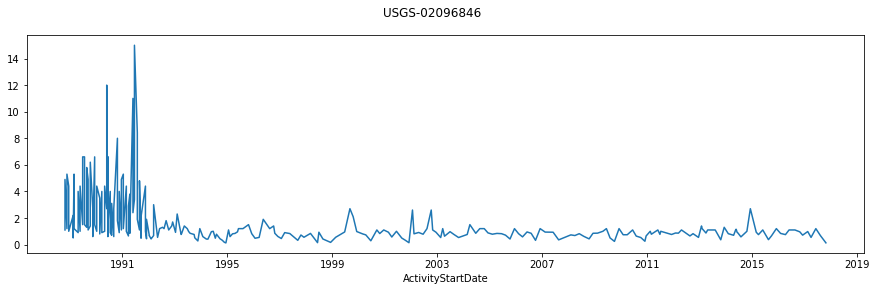

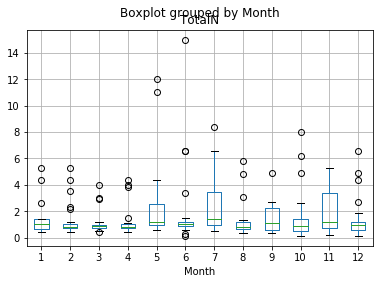

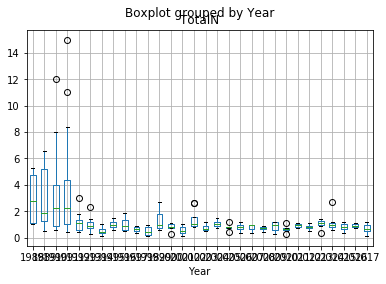

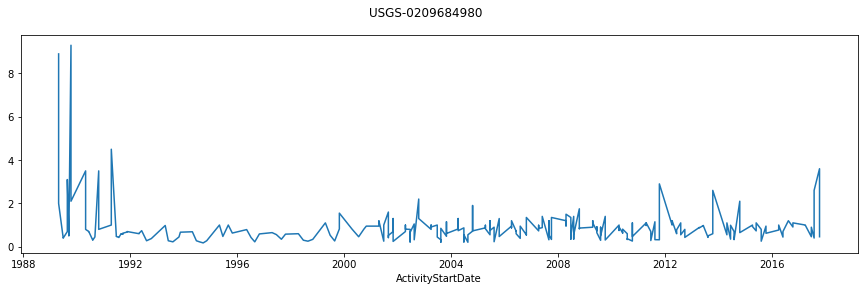

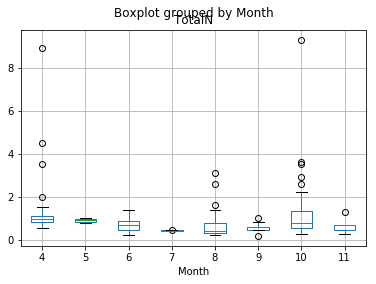

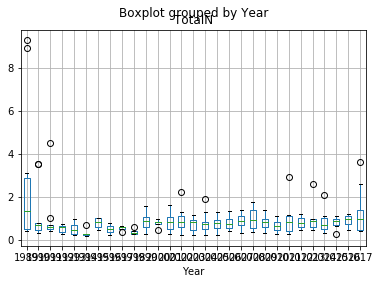

In [91]:
#Loop
for siteID in siteIDs[:2]:
    fig = plt.figure(figsize=(15,4))
    #Subset for site
    dfSite = df[df['MonitoringLocationIdentifier'] == siteID]
    #Plot
    ax=fig.add_subplot(111)
    dfSite['TotalN'].sort_index().plot(subplots=True,title=siteID)
    plt.show()
    
    ax=fig.add_subplot(211)
    dfSite.boxplot(column='TotalN',by='Month')
    plt.show()
    
    fig.add_subplot(221)
    dfSite.boxplot(column='TotalN',by='Year')
    plt.show()

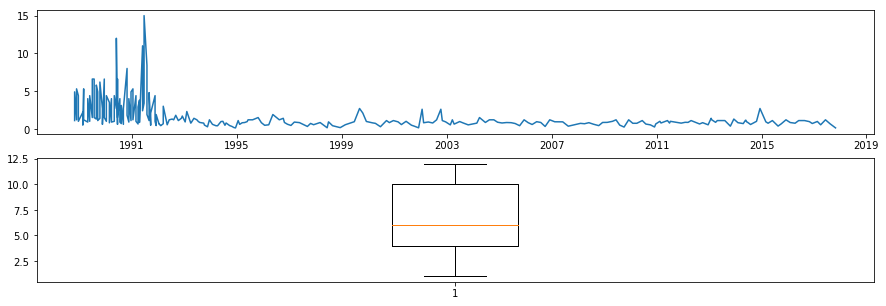

In [56]:
fig = plt.figure(figsize=(15,5))
plt.subplot(2,1,1)

plt.figure(1)
plt.subplot(211)
plt.plot(dfSite.sort_index()['TotalN'])

plt.subplot(212)
plt.boxplot(data=dfSite,x='Month');